# Use Case
- Image Classification: SVM is used to classify images into different categories.
- Text Classification: SVM is effective in text categorization tasks such as spam detection, sentiment analysis, and topic categorization.
- Bioinformatics: SVM is used for protein classification and gene expression data analysis.
- Handwriting Recognition: SVM is employed to recognize handwritten characters.
- Financial Analysis: SVM is applied in credit risk analysis, fraud detection, and stock market prediction.

# Application Areas
- Healthcare: Disease prediction and diagnosis, medical image analysis.
- Finance: Credit scoring, fraud detection, algorithmic trading.
- Marketing: Customer segmentation, churn prediction.
- Manufacturing: Fault detection, quality control.
- Social Media: Sentiment analysis, spam filtering.

# Advantages
- Effective in High-Dimensional Spaces: SVM works well when the number of dimensions exceeds the number of samples.
- Memory Efficient: SVM only uses a subset of training points (support vectors) in the decision function.
- Versatile: Different kernel functions can be specified for the decision function, providing flexibility in handling different data structures.
- Robust to Overfitting: With proper regularization, SVM can avoid overfitting, especially in high-dimensional spaces.

# Disadvantages
- Computationally Intensive: Training an SVM can be time-consuming for large datasets, especially with complex kernel functions.
- Choice of Kernel: The performance of SVM heavily depends on the choice of the kernel and its parameters, which require careful tuning.
- Not Suitable for Large Datasets: SVMs are not suitable for very large datasets due to their high training time and memory consumption.
- Interpretability: SVM models are less interpretable compared to some other models like decision trees or logistic regression.

# Sample Implementations

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='rbf', C=1, gamma=0.1)
svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Metrics Used for Evaluating SVM Models

## Confusion Matrix

- Definition: A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of true positive (TP), - false positive (FP), true negative (TN), and false negative (FN) predictions.

- Importance: Provides a comprehensive view of the performance of a classification model, including both correct and incorrect predictions.

- Ideal Values: High values of TP and TN, and low values of FP and FN.

- Value Range: The values are non-negative integers, depending on the dataset size.

Interpretation:
- True Positives (TP): Correctly predicted positive cases.
- False Positives (FP): Incorrectly predicted positive cases.
- True Negatives (TN): Correctly predicted negative cases.
-  False Negatives (FN): Incorrectly predicted negative cases.

When to Use: Always use the confusion matrix for classification problems to get a detailed understanding of the model's performance.



In [2]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Accuracy
- Definition: The ratio of correctly predicted observations to the total observations.
- Accuracy=TP+TN/TP+TN+FP+FN
- Importance: Provides an overall measure of how well the model is performing.
- Ideal Value: Close to 1 (100%).
- Value Range: [0, 1]

Interpretation: Indicates the proportion of correct predictions out of all predictions made.

When to Use: Use when the dataset is balanced or the cost of false positives and false negatives is similar.

In [3]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


## Precision
- Definition: The ratio of correctly predicted positive observations to the total predicted positives.
- Precision=TP/TP+FP
- Importance: Indicates the accuracy of positive predictions.
- Ideal Value: Close to 1 (100%).
- Value Range: [0, 1]

Interpretation: High precision indicates that the model has a low false positive rate.

When to Use: Use when the cost of false positives is high (e.g., spam detection).

In [4]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision}")


Precision: 1.0


## Recall (Sensitivity or True Positive Rate)
- Definition: The ratio of correctly predicted positive observations to all the observations in the actual class.
- Recall=TP/TP+FN
- Importance: Indicates the ability of the model to find all relevant cases within a dataset.
- Ideal Value: Close to 1 (100%).
- Value Range: [0, 1]
Interpretation: High recall indicates that the model has a low false negative rate.

When to Use: Use when the cost of false negatives is high (e.g., disease detection).

In [5]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall}")


Recall: 1.0


##  F1-Score

- Definition: The weighted average of precision and recall.
- F1-Score=2⋅Precision⋅RecallPrecision+Recall
- F1-Score=2⋅Precision+RecallPrecision⋅Recall​

- Importance: Provides a single metric that balances precision and recall, especially useful for imbalanced datasets.

- Ideal Value: Close to 1 (100%).

- Value Range: [0, 1]

Interpretation: High F1-score indicates a good balance between precision and recall.

When to Use: Use when both precision and recall are important for the problem at hand.

In [8]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1}")


F1-Score: 1.0


## ROC Curve and AUC (Area Under the Curve)

- Definition: The ROC curve plots the true positive rate (recall) against the false positive rate (1-specificity) at various threshold settings. AUC measures the entire two-dimensional area underneath the ROC curve.

- Importance: Provides a graphical representation of the model's performance across all classification thresholds.

- Ideal Value: AUC close to 1 (100%).

- Value Range: [0, 1]

Interpretation: The closer the ROC curve is to the top-left corner, the better the model. A higher AUC indicates better overall performance.

When to Use: Use when you need to evaluate the model's ability to distinguish between positive and negative classes across all thresholds.


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score = svm.decision_function(X_test)
print(y_test.shape, y_score)
fpr, tpr, _ = roc_curve(y_test, y_score[:,0], pos_label=1)
auc = roc_auc_score(y_test, y_score[:,0])

print(y_test.shape, y_score.shape)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


(45,) [[-0.22640627  2.23073199  0.96127892]
 [ 2.22297046  1.13683975 -0.24364919]
 [-0.20848806  0.82714694  2.24437494]
 [-0.22845554  2.21856079  1.07169169]
 [-0.23088588  2.20729809  1.12615732]
 [ 2.2238635   1.17760574 -0.25369271]
 [-0.19271614  2.23738723  0.82511984]
 [-0.22997416  0.96052608  2.23410718]
 [-0.23583637  2.20720842  1.14564855]
 [-0.21439368  2.2412541   0.85006584]
 [-0.22947092  1.10756537  2.2113642 ]
 [ 2.22856018  1.15484696 -0.25100915]
 [ 2.2313992   1.14939499 -0.25167976]
 [ 2.2300977   1.15704859 -0.25242207]
 [ 2.23387197  1.07349102 -0.24161246]
 [-0.21257034  2.1931577   1.09218209]
 [-0.23712695  0.91608171  2.24564252]
 [-0.21460431  2.24180316  0.84839171]
 [-0.22374519  2.23006443  0.94769325]
 [-0.24096751  0.94089435  2.24617309]
 [ 2.23127069  1.1404695  -0.24988115]
 [-0.23428669  1.17405185  2.18666403]
 [ 2.22896471  1.15481824 -0.25125303]
 [-0.24156538  0.9888534   2.24243119]
 [-0.19544972  0.91878166  2.2116631 ]
 [-0.23440152  0.95

ValueError: multi_class must be in ('ovo', 'ovr')

# Hyperparameters in SVM

## C (Regularization Parameter)
- Definition: The regularization parameter CC controls the trade-off between maximizing the margin and minimizing the classification error. A smaller CC encourages a larger margin, while a larger CC aims to classify all training examples correctly.
- Importance: Balances the model complexity and the extent of misclassification on the training data.
- Ideal Value: Depends on the dataset; typically found using cross-validation.
- Value Range: C>0
Interpretation:
- Small CC: Larger margin, possibly more misclassifications.
- Large CC: Smaller margin, fewer misclassifications, but may overfit.

When to Use: Always tune CC to find a balance between bias and variance.

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(SVC(kernel='rbf', gamma=0.1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best C: {grid_search.best_params_['C']}")


Best C: 1


## Kernel Type
- Definition: The kernel function transforms the input data into a higher-dimensional space to find a linear separator.
- Importance: Determines the shape of the decision boundary.
- Common Kernels:
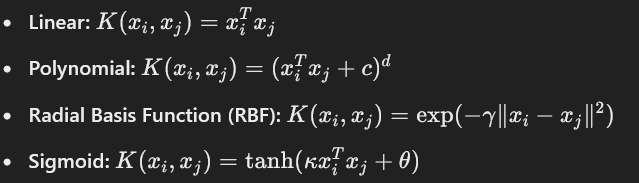
- Ideal Value: Depends on the dataset and the problem.
Interpretation:
- Linear: Best for linearly separable data.
- Polynomial and RBF: Best for non-linearly separable data.
- Sigmoid: Can be used but is less common.

When to Use: Experiment with different kernels and use cross-validation to select the best one.

In [19]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} # rbf generally used
grid_search = GridSearchCV(SVC(C=1, gamma=0.1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best kernel: {grid_search.best_params_['kernel']}")


Best kernel: rbf


## Gamma (Kernel Coefficient for RBF, Polynomial, and Sigmoid Kernels)
- Definition: Defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'.

- Importance: Affects the decision boundary shape.

- Ideal Value: Depends on the dataset; typically found using cross-validation.

- Value Range: γ>0
Interpretation:
- Low gamma: The model is too constrained and has a high bias.
- High gamma: The model captures more details but may overfit.

When to Use: Always tune γγ for non-linear kernels like RBF.

In [20]:
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid_search = GridSearchCV(SVC(kernel='rbf', C=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best gamma: {grid_search.best_params_['gamma']}")


Best gamma: 0.1


## Degree (for Polynomial Kernel)
- Definition: Degree of the polynomial kernel function.
- Importance: Controls the flexibility of the polynomial kernel.
- Ideal Value: Typically a small integer; found using cross-validation.
- Value Range: degree≥1degree≥1

Interpretation:
- Low degree: Simpler decision boundary.
- High degree: More complex decision boundary, risk of overfitting.

When to Use: Only relevant for the polynomial kernel. Tune using cross-validation.

In [21]:
param_grid = {'degree': [2, 3, 4, 5]}
grid_search = GridSearchCV(SVC(kernel='poly', C=1, gamma=0.1), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best degree: {grid_search.best_params_['degree']}")


Best degree: 3


## Coef0 (for Polynomial and Sigmoid Kernels)

- Definition: Independent term in kernel function. It is significant in controlling the influence of higher-order versus lower-order terms in the polynomial and sigmoid kernels.

- Importance: Adjusts the model complexity for polynomial and sigmoid kernels.

- Ideal Value: Typically found using cross-validation.

- Value Range: Any real number.

Interpretation:

- Low coef0: Less influence of higher-order terms.
- High coef0: More influence of higher-order terms.

When to Use: Tune for polynomial and sigmoid kernels.

In [22]:
param_grid = {'coef0': [0, 0.1, 0.5, 1, 2]}
grid_search = GridSearchCV(SVC(kernel='poly', C=1, gamma=0.1, degree=3), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best coef0: {grid_search.best_params_['coef0']}")


Best coef0: 1


## Probability

- Definition: Whether to enable probability estimates.

- Importance: Useful if you need probability estimates for your classification problem.

- Ideal Value: True or False.

- Value Range: True or False.

Interpretation: Enables the model to output probability estimates. Adds computational overhead.

When to Use: When you need probability estimates for your predictions.

In [23]:
svm = SVC(C=1, gamma=0.1, probability=True)
svm.fit(X_train, y_train)
y_pred_prob = svm.predict_proba(X_test)


Summary

Selecting and tuning hyperparameters for SVM is crucial for model performance. Use cross-validation to find the optimal values for:

- C (Regularization Parameter): Balances margin maximization and misclassification minimization.
- Kernel Type: Determines the transformation of input data into a higher-dimensional space.
- Gamma (for RBF, Polynomial, and Sigmoid Kernels): Controls the influence radius of training examples.
- Degree (for Polynomial Kernel): Sets the degree of the polynomial kernel function.
- Coef0 (for Polynomial and Sigmoid Kernels): Adjusts the influence of higher-order terms.
- Probability: Enables probability estimates for predictions.

By systematically tuning these hyperparameters, you can improve the performance and robustness of your SVM model.